In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


# Understanding the Centroids from K-Means

### 1) Import Data and apply KMeans

In [2]:

articles_df = pd.read_pickle("data/articles.pkl")
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 2) Print centroids as vectors

In [3]:
print("\n2) cluster centers:")
print(kmeans.cluster_centers_)


2) cluster centers:
[[0.00000000e+00 1.00137448e-02 0.00000000e+00 ... 0.00000000e+00
  4.68280789e-04 0.00000000e+00]
 [0.00000000e+00 3.01239879e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25823024e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 9.69535986e-03 0.00000000e+00 ... 1.45189757e-04
  1.27698434e-04 0.00000000e+00]
 [0.00000000e+00 1.04964074e-02 0.00000000e+00 ... 0.00000000e+00
  9.45784987e-05 6.54092925e-05]
 [0.00000000e+00 6.05128738e-03 0.00000000e+00 ... 0.00000000e+00
  1.45352945e-03 0.00000000e+00]]


### 3) Print centroids as words

In [4]:
# 3. Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n3) top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}, {', '.join(features[i] for i in centroid)}")


3) top features (words) for each cluster:
0, republican, government, health, house, care, party, mr, shutdown, senate, obama
1, yard, game, touchdown, quarterback, team, giant, season, smith, jet, manning
2, iran, rouhani, iranian, nuclear, mr, obama, israel, united, netanyahu, president
3, mr, art, music, ms, work, opera, museum, dance, new, song
4, game, yankee, season, rivera, inning, league, team, said, run, pettitte
5, mr, said, court, state, government, official, syria, united, people, police
6, said, year, new, company, percent, team, cup, million, like, people
7, mall, shabab, kenya, kenyan, attack, somalia, nairobi, militant, somali, said


### 4) Try fewer features

In [5]:
# 4. Limit the number of features and see if the words of the topics change.
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()
kmeans = KMeans()
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n4) top features for each cluster with 1000 max features:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}: {', '.join(features[i] for i in centroid)}")



4) top features for each cluster with 1000 max features:
0: mr, said, court, judge, state, party, case, government, official, year
1: game, season, team, said, player, yankee, league, yard, play, coach
2: iran, rouhani, iranian, nuclear, mr, obama, israel, united, president, netanyahu
3: percent, said, company, government, bank, market, year, china, rate, price
4: mr, music, art, work, ms, opera, song, museum, dance, orchestra
5: said, new, year, cup, sept, people, time, like, world, team
6: attack, said, syria, killed, official, united, government, weapon, security, people
7: republican, health, house, care, government, senate, obama, law, mr, shutdown


### 5) Get random samples for each group

In [6]:
print("\n5) random sample of titles in each cluster")
assigned_cluster = kmeans.transform(X).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_articles = np.random.choice(cluster, 3, replace=False)
    print(f"cluster {i}:")
    for article in sample_articles:
        print(f"    {articles_df.loc[article]['headline']}")


5) random sample of titles in each cluster
cluster 0:
    A Jury of Whose Peers?
    Greece Arrests Senior Members of Far-Right Party
    A Polling Place of Their Own: Students Win a Long Battle
cluster 1:
    Islanders Coach Is Tough on Himself and His Team
    Is the Game Over?
    Nova Throws for 3 Touchdowns as Rutgers Rallies Past Arkansas
cluster 2:
    Now, the Hard Part
    The True Face of Iran
    Iran’s New President Preaches Tolerance in First U.N. Appearance
cluster 3:
    The Rut We Can’t Get Out Of
    Europe's Greens Are a Victim of Their Own Success
    Air France-KLM Could Aid a Struggling Alitalia
cluster 4:
    A Loner, Playing With the Crowd
    A Museum Works to Reinvent Itself, as Well as the American West
    From Art to T. Rex, Shutdown Stirs Worry
cluster 5:
    Linebacker for 49ers Is Arrested After Crash
    Another Title for Japanese Skater
    Jellyfish Invasion Paralyzes Swedish Reactor
cluster 6:
    Iraq: Bombs Kill Worshipers at Mosque Near Samarra
  

### 6) Name each topic (answers will vary)

### 7) Set k = # sections.  Find and count sections for each group

### Not a perfect map to each section

In [7]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)


In [8]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = articles_df.loc[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    print(f"Cluster {i}:")
    for j in range (len(most_common)):
        print(f"     {most_common[j][0]} ({most_common[j][1]} articles)")

Cluster 0:
     Business Day (34 articles)
     Opinion (11 articles)
     World (9 articles)
     U.S. (7 articles)
     Sports (1 articles)
     Arts (1 articles)
Cluster 1:
     Arts (89 articles)
     Opinion (3 articles)
     Business Day (2 articles)
     World (1 articles)
Cluster 2:
     World (30 articles)
     Business Day (2 articles)
     U.S. (1 articles)
Cluster 3:
     World (22 articles)
     Opinion (3 articles)
     U.S. (1 articles)
Cluster 4:
     World (145 articles)
     U.S. (6 articles)
     Opinion (4 articles)
     Business Day (2 articles)
     Sports (2 articles)
Cluster 5:
     Sports (30 articles)
Cluster 6:
     Sports (92 articles)
     World (3 articles)
     Arts (1 articles)
     Opinion (1 articles)
     Business Day (1 articles)
Cluster 7:
     Sports (72 articles)
     Arts (1 articles)
Cluster 8:
     Business Day (27 articles)
     Arts (24 articles)
     Sports (23 articles)
     Opinion (13 articles)
     World (5 articles)
     U.S. (1 article

### 8) Try only 3 sections.   Still not a perfect map

In [9]:
mask = articles_df['section_name'].isin(['Sports', 'Arts', 'Business Day'])
three_articles_df = articles_df[mask]
kmeans = KMeans(n_clusters=3)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(three_articles_df['content'])
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print("8) Top topics for each cluster")
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = three_articles_df.iloc[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    print(f"Cluster {i}:")
    for j in range (len(most_common)):
        print(f"     {most_common[j][0]} ({most_common[j][1]} articles)")

8) Top topics for each cluster
Cluster 0:
     Business Day (13 articles)
Cluster 1:
     Arts (116 articles)
     Sports (62 articles)
     Business Day (57 articles)
Cluster 2:
     Sports (158 articles)


# Hierarchical Clustering

### 1) Create small subsample

In [10]:
small_mask = np.zeros(len(articles_df)).astype(bool)
indices = np.arange(len(articles_df))
for category in articles_df['section_name'].unique():
    category_mask = (articles_df['section_name']==category).values
    new_index = np.random.choice(indices[category_mask])
    small_mask[new_index] = True
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      100 - sum(small_mask),
                                      replace=False)
small_mask[additional_indices] = True
small_df = articles_df.loc[small_mask]

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()

### 2) Get distances using pdist

In [ ]:
distances = pdist(small_X.todense(), metric='Cosine')
# now get distances

### 3) Put in square form

In [11]:
distxy = squareform(distances)

### 4) Pass this matrix into scipy's linkage function to compute our hierarchical clusters.

In [ ]:
link = linkage(distxy, method='complete')

### 5) Using scipy's dendrogram function plot the linkages as a hierachical tree.

/home/pkgalea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


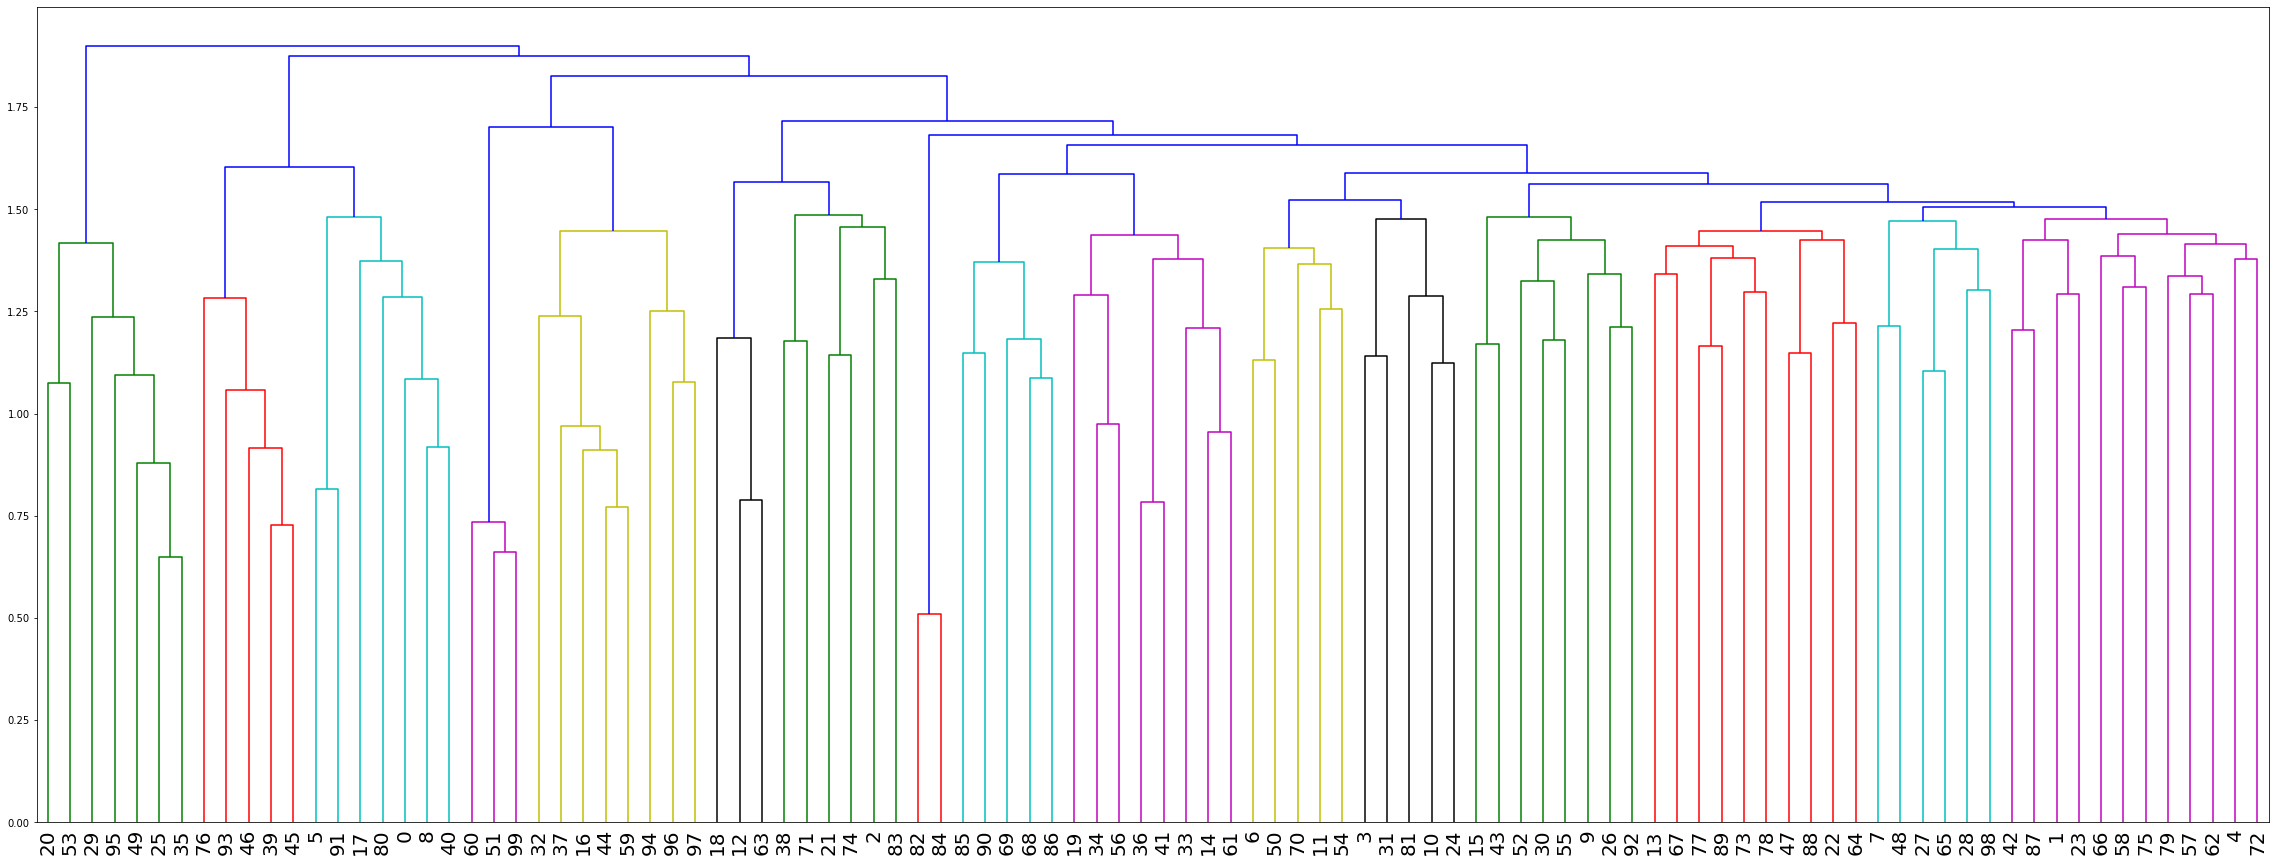

In [12]:
fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=20, ax=ax)
plt.show()

## HIERARCHICAL TOPICS

### 1. Add labels

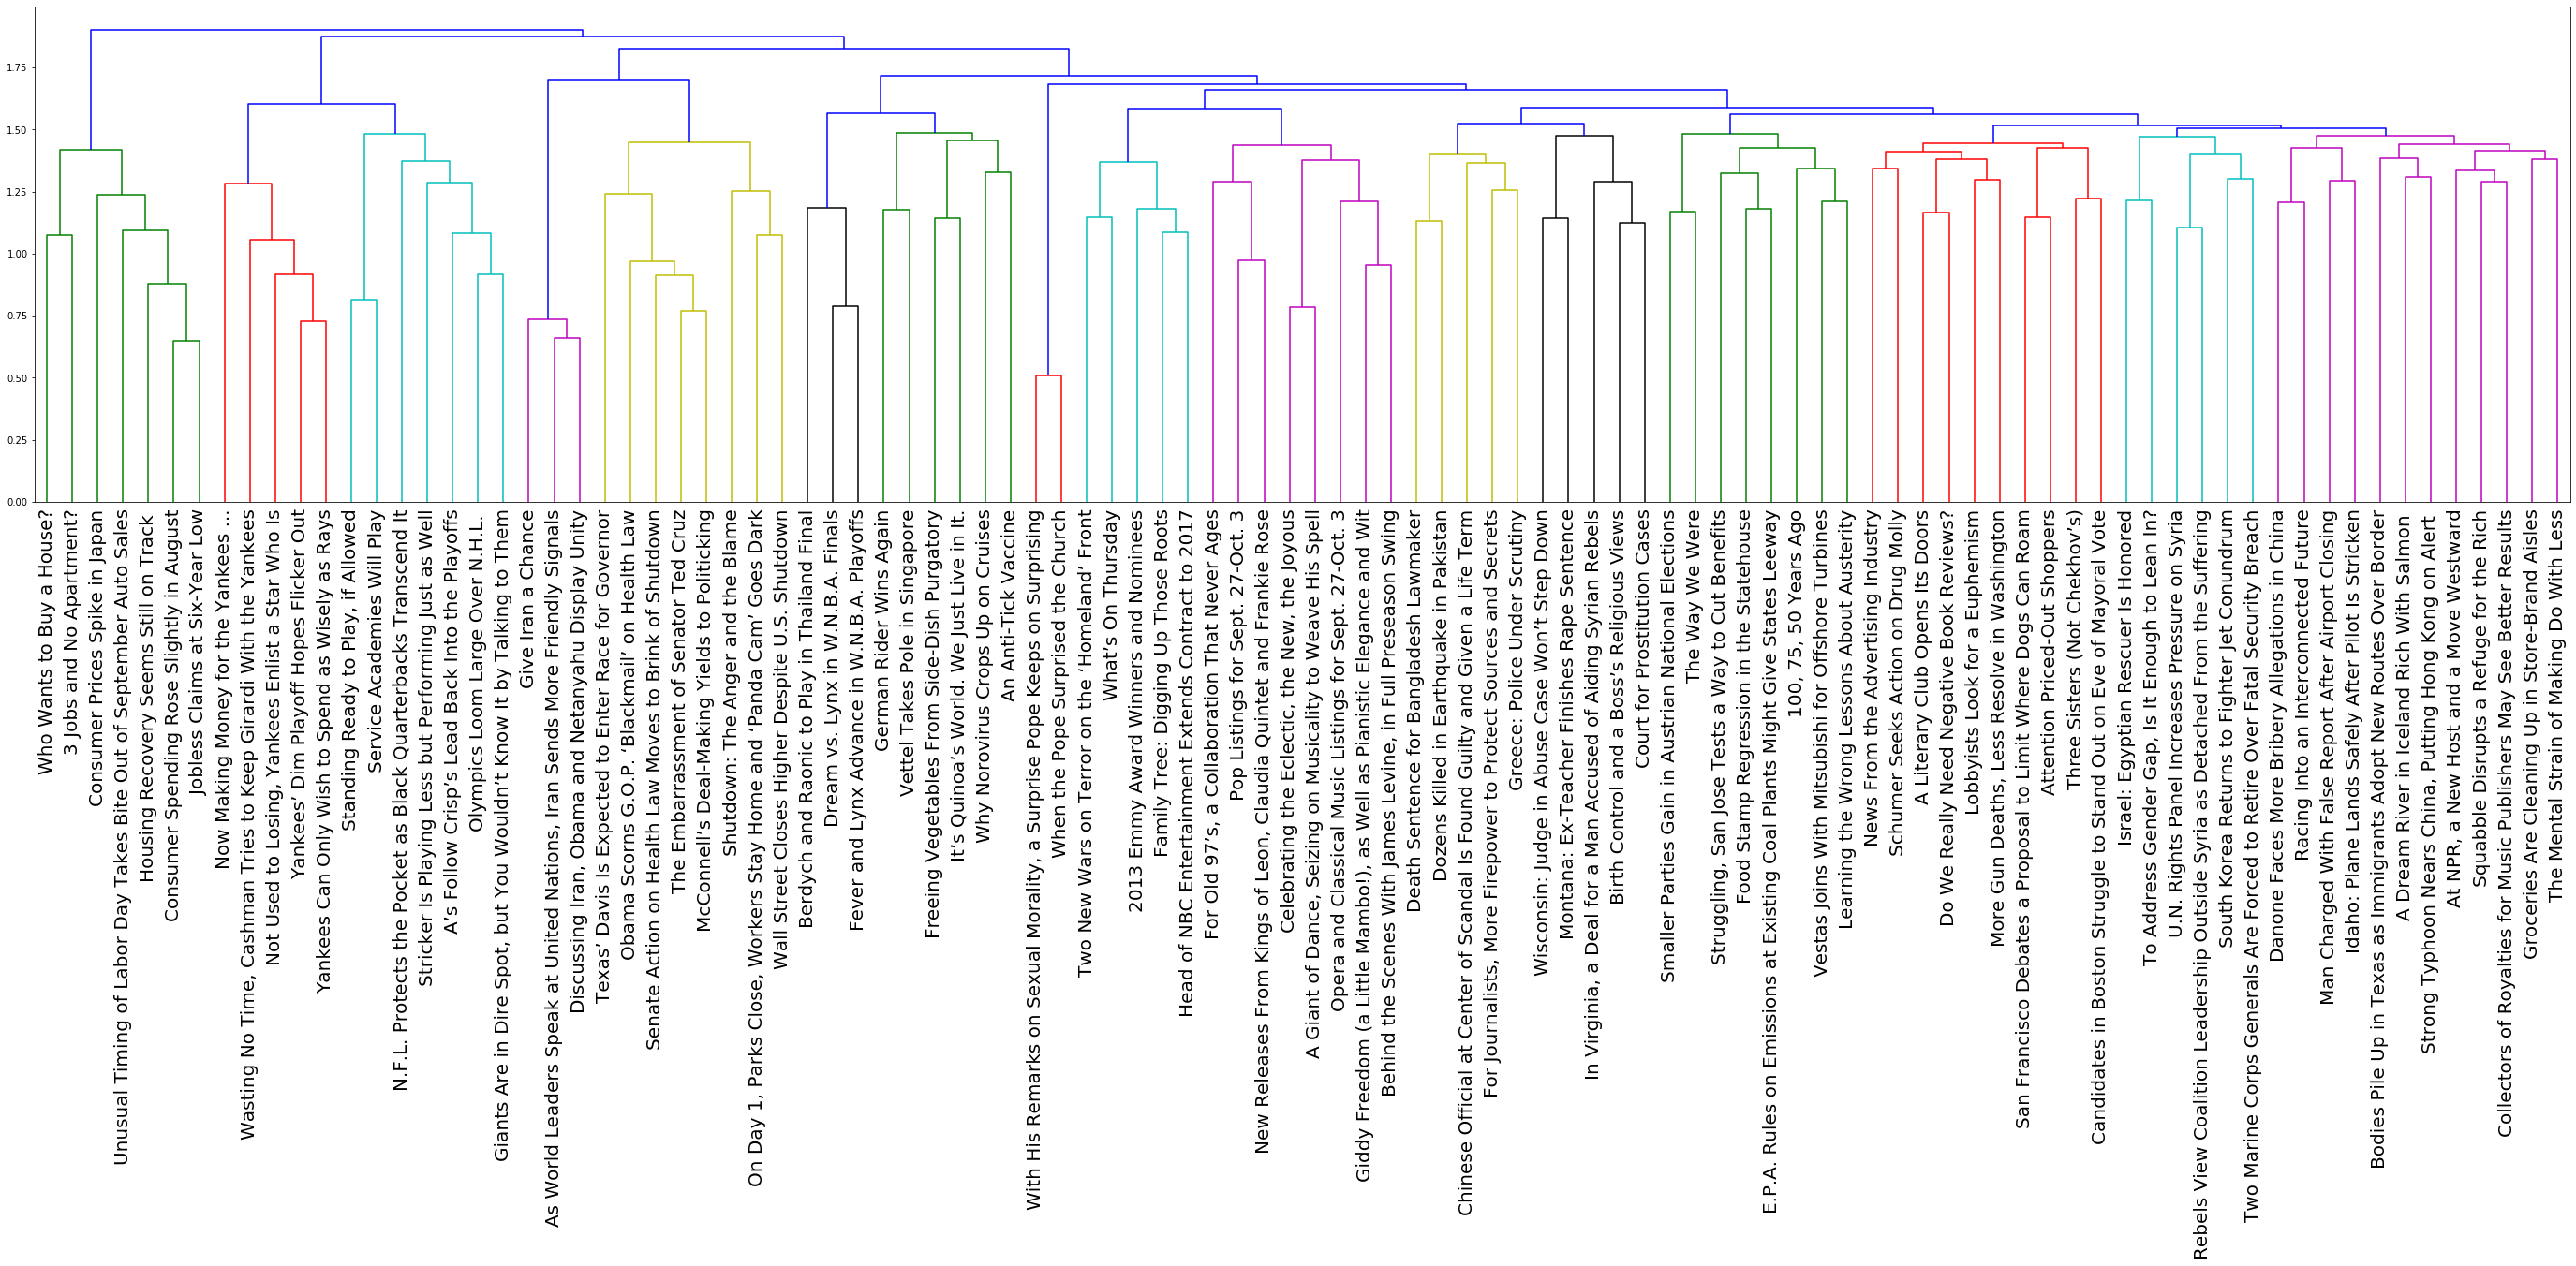

In [20]:

fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=20,
                    labels=small_df['headline'].values, ax=ax)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
plt.show()

### 2. Label each point with the title and the section.

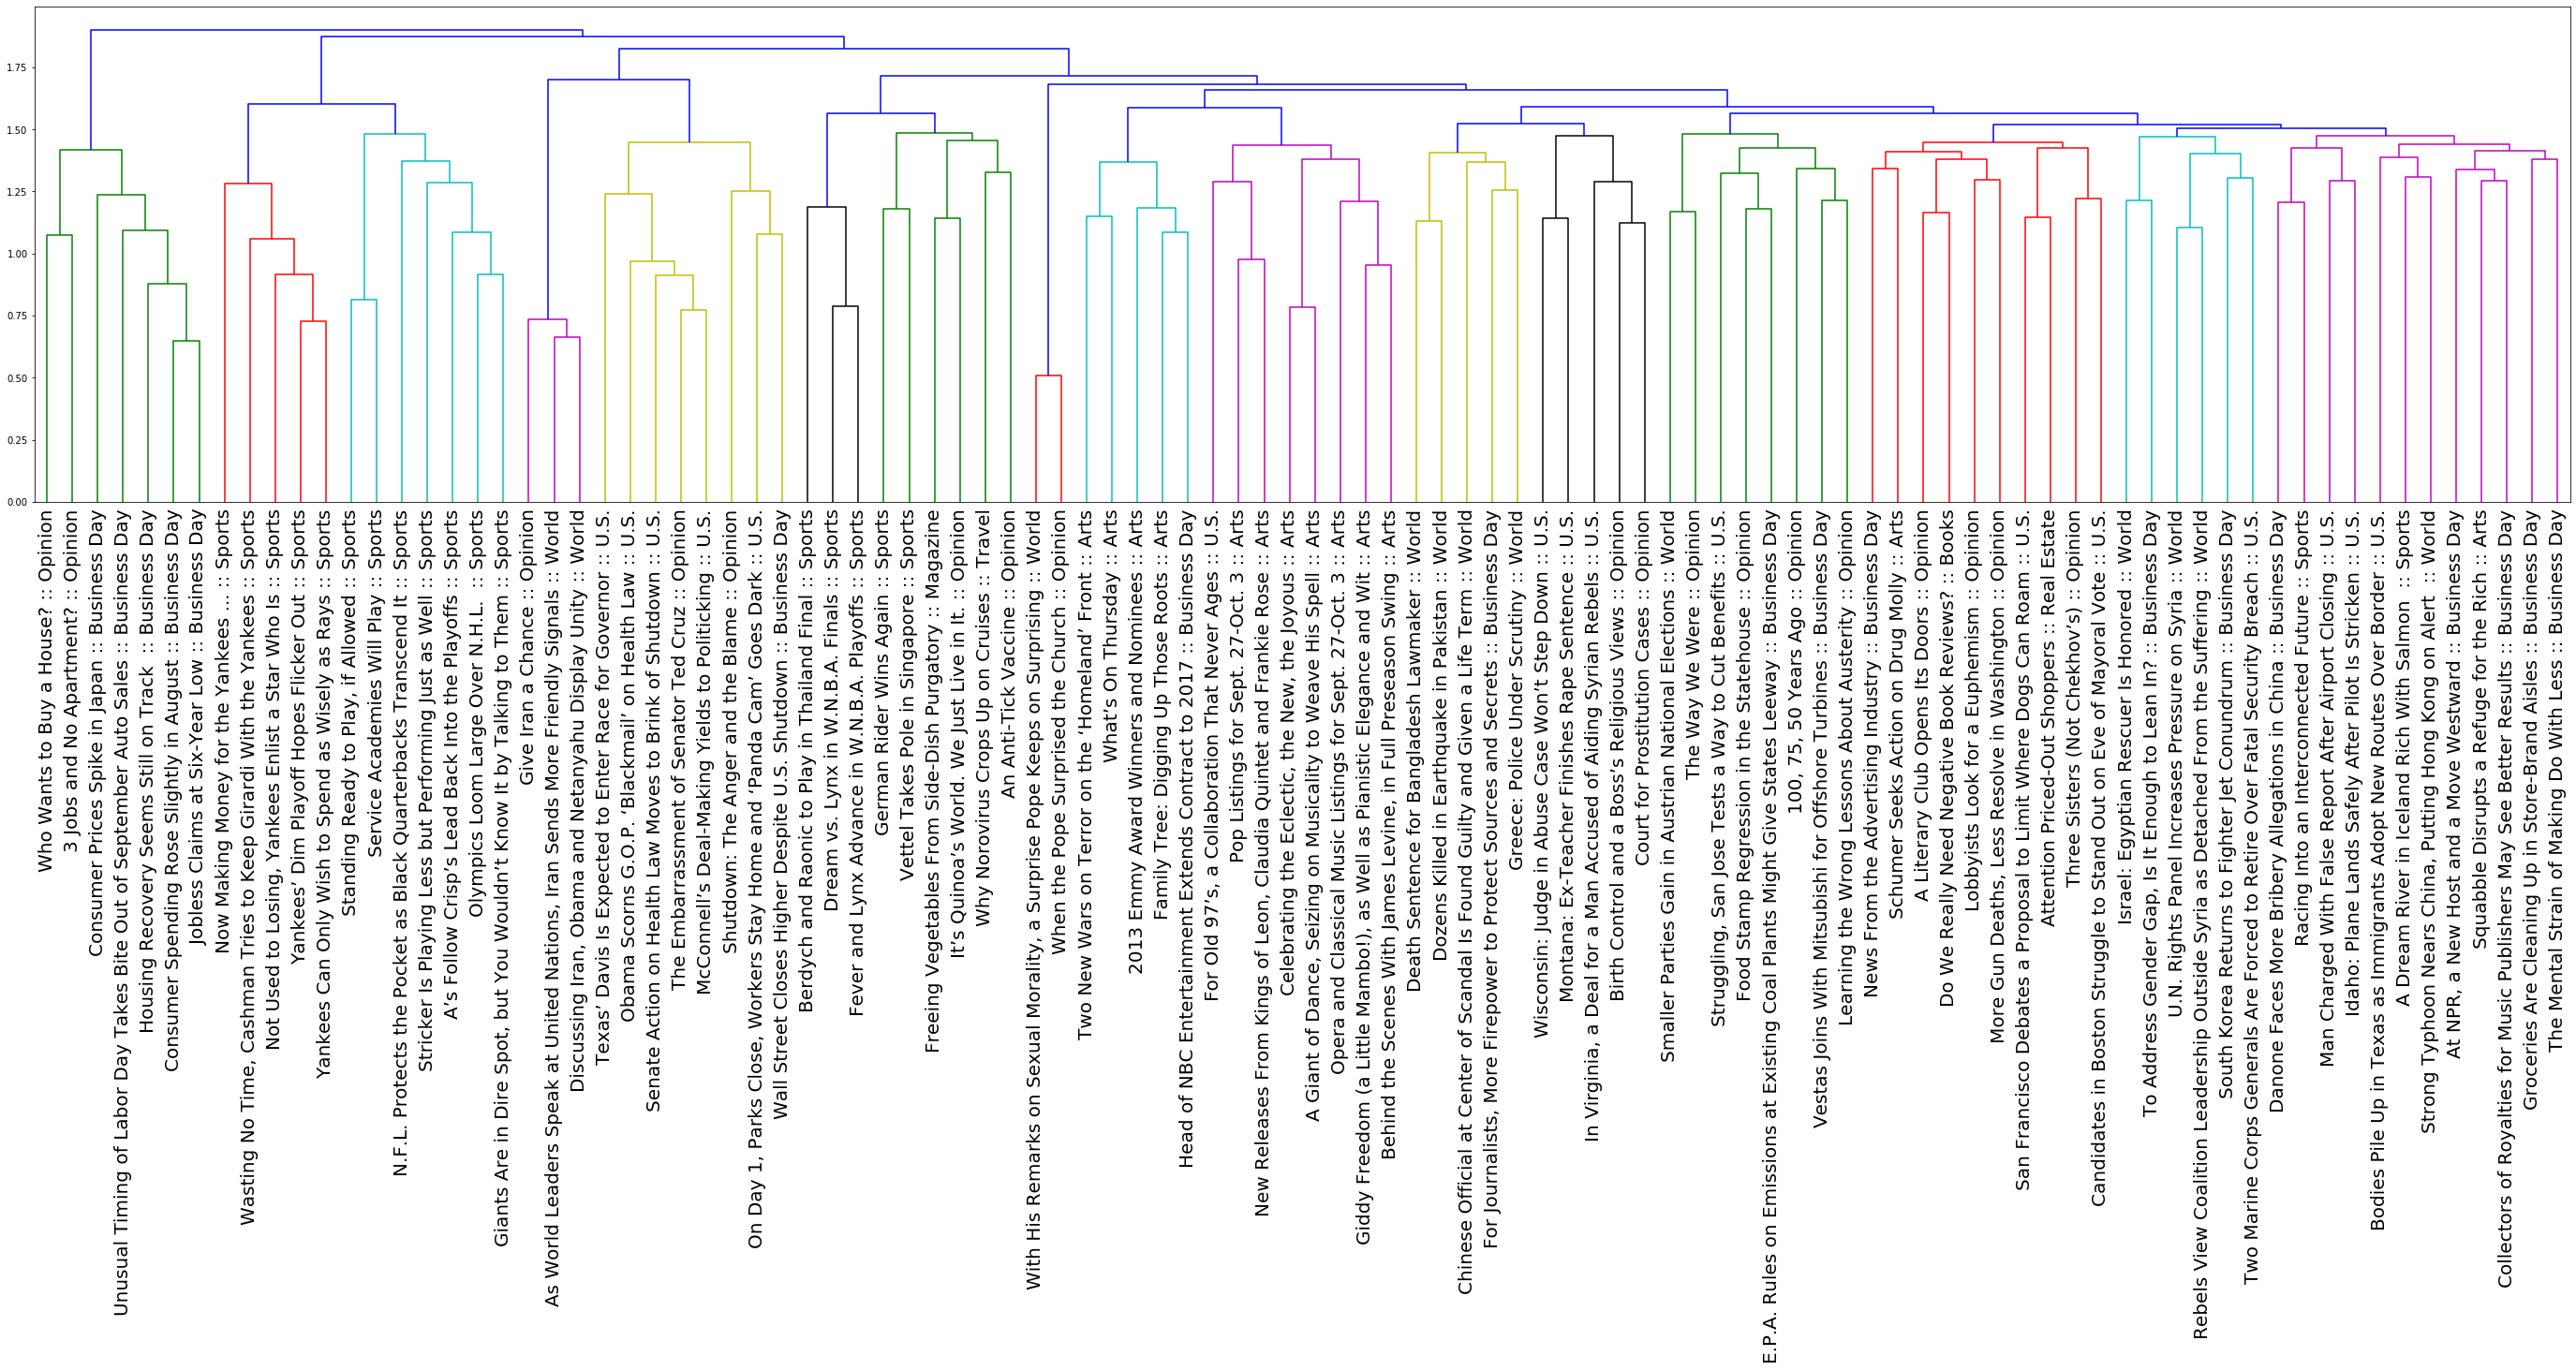

In [14]:
labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=20,
                    labels=labels, ax=ax)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
plt.show()

### 3. Explore different clusters on a per section basis.

/home/pkgalea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()
/home/pkgalea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()
/home/pkgalea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


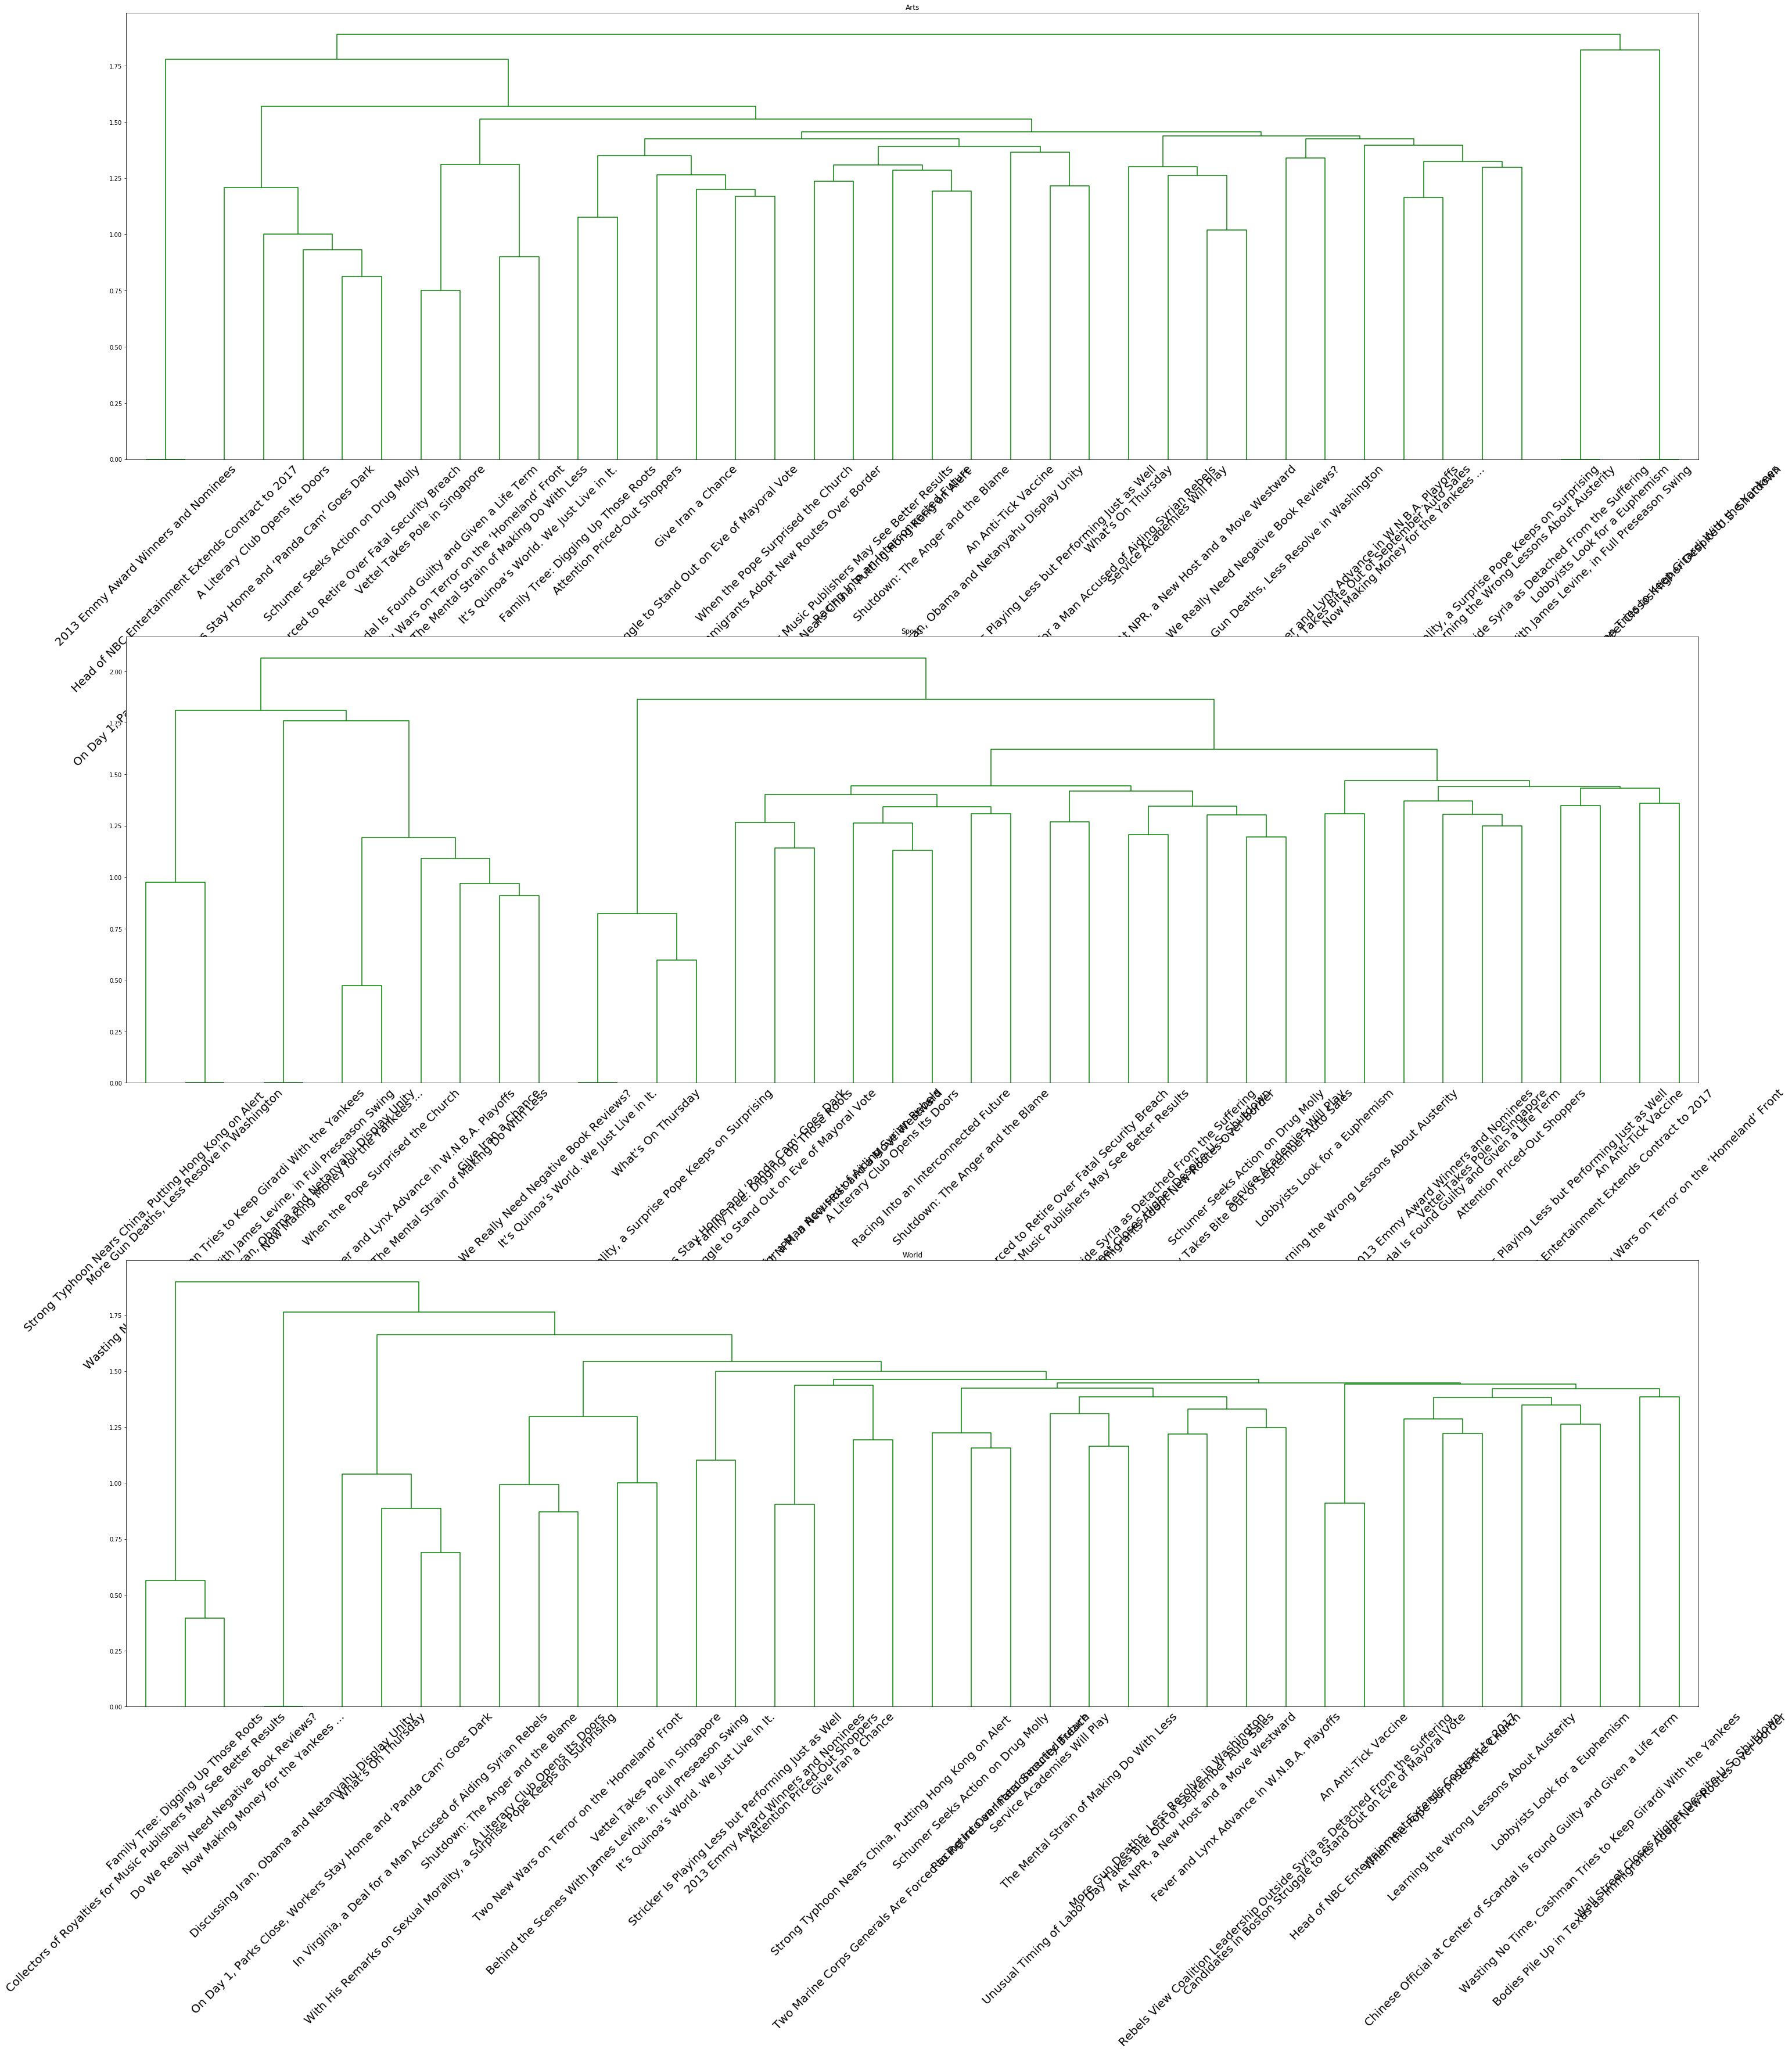

In [17]:

fig, ax = plt.subplots(3, 1, figsize=(40,90))

for i, category in enumerate(['Arts', 'Sports', 'World']):
    cat_indices = articles_df[articles_df['section_name']==category].index
    indices = np.random.choice(cat_indices, 40)
    cat_df = articles_df.loc[indices]
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    cat_X = vectorizer.fit_transform(cat_df['content'])
    distxy = squareform(pdist(cat_X.todense(), metric='cosine'))

    dendro = dendrogram(linkage(distxy, method='complete'),
                        color_threshold=4,
                        leaf_font_size=20,
                        labels=small_df['headline'].values, ax=ax[i])
    ax[i].set_title(category)
fig.tight_layout() 
plt.subplots_adjust(top=.95, bottom=0.5, left=0.05, right=0.99)
plt.show()

### 5 & 6 Try Euclidean Distance

/home/pkgalea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


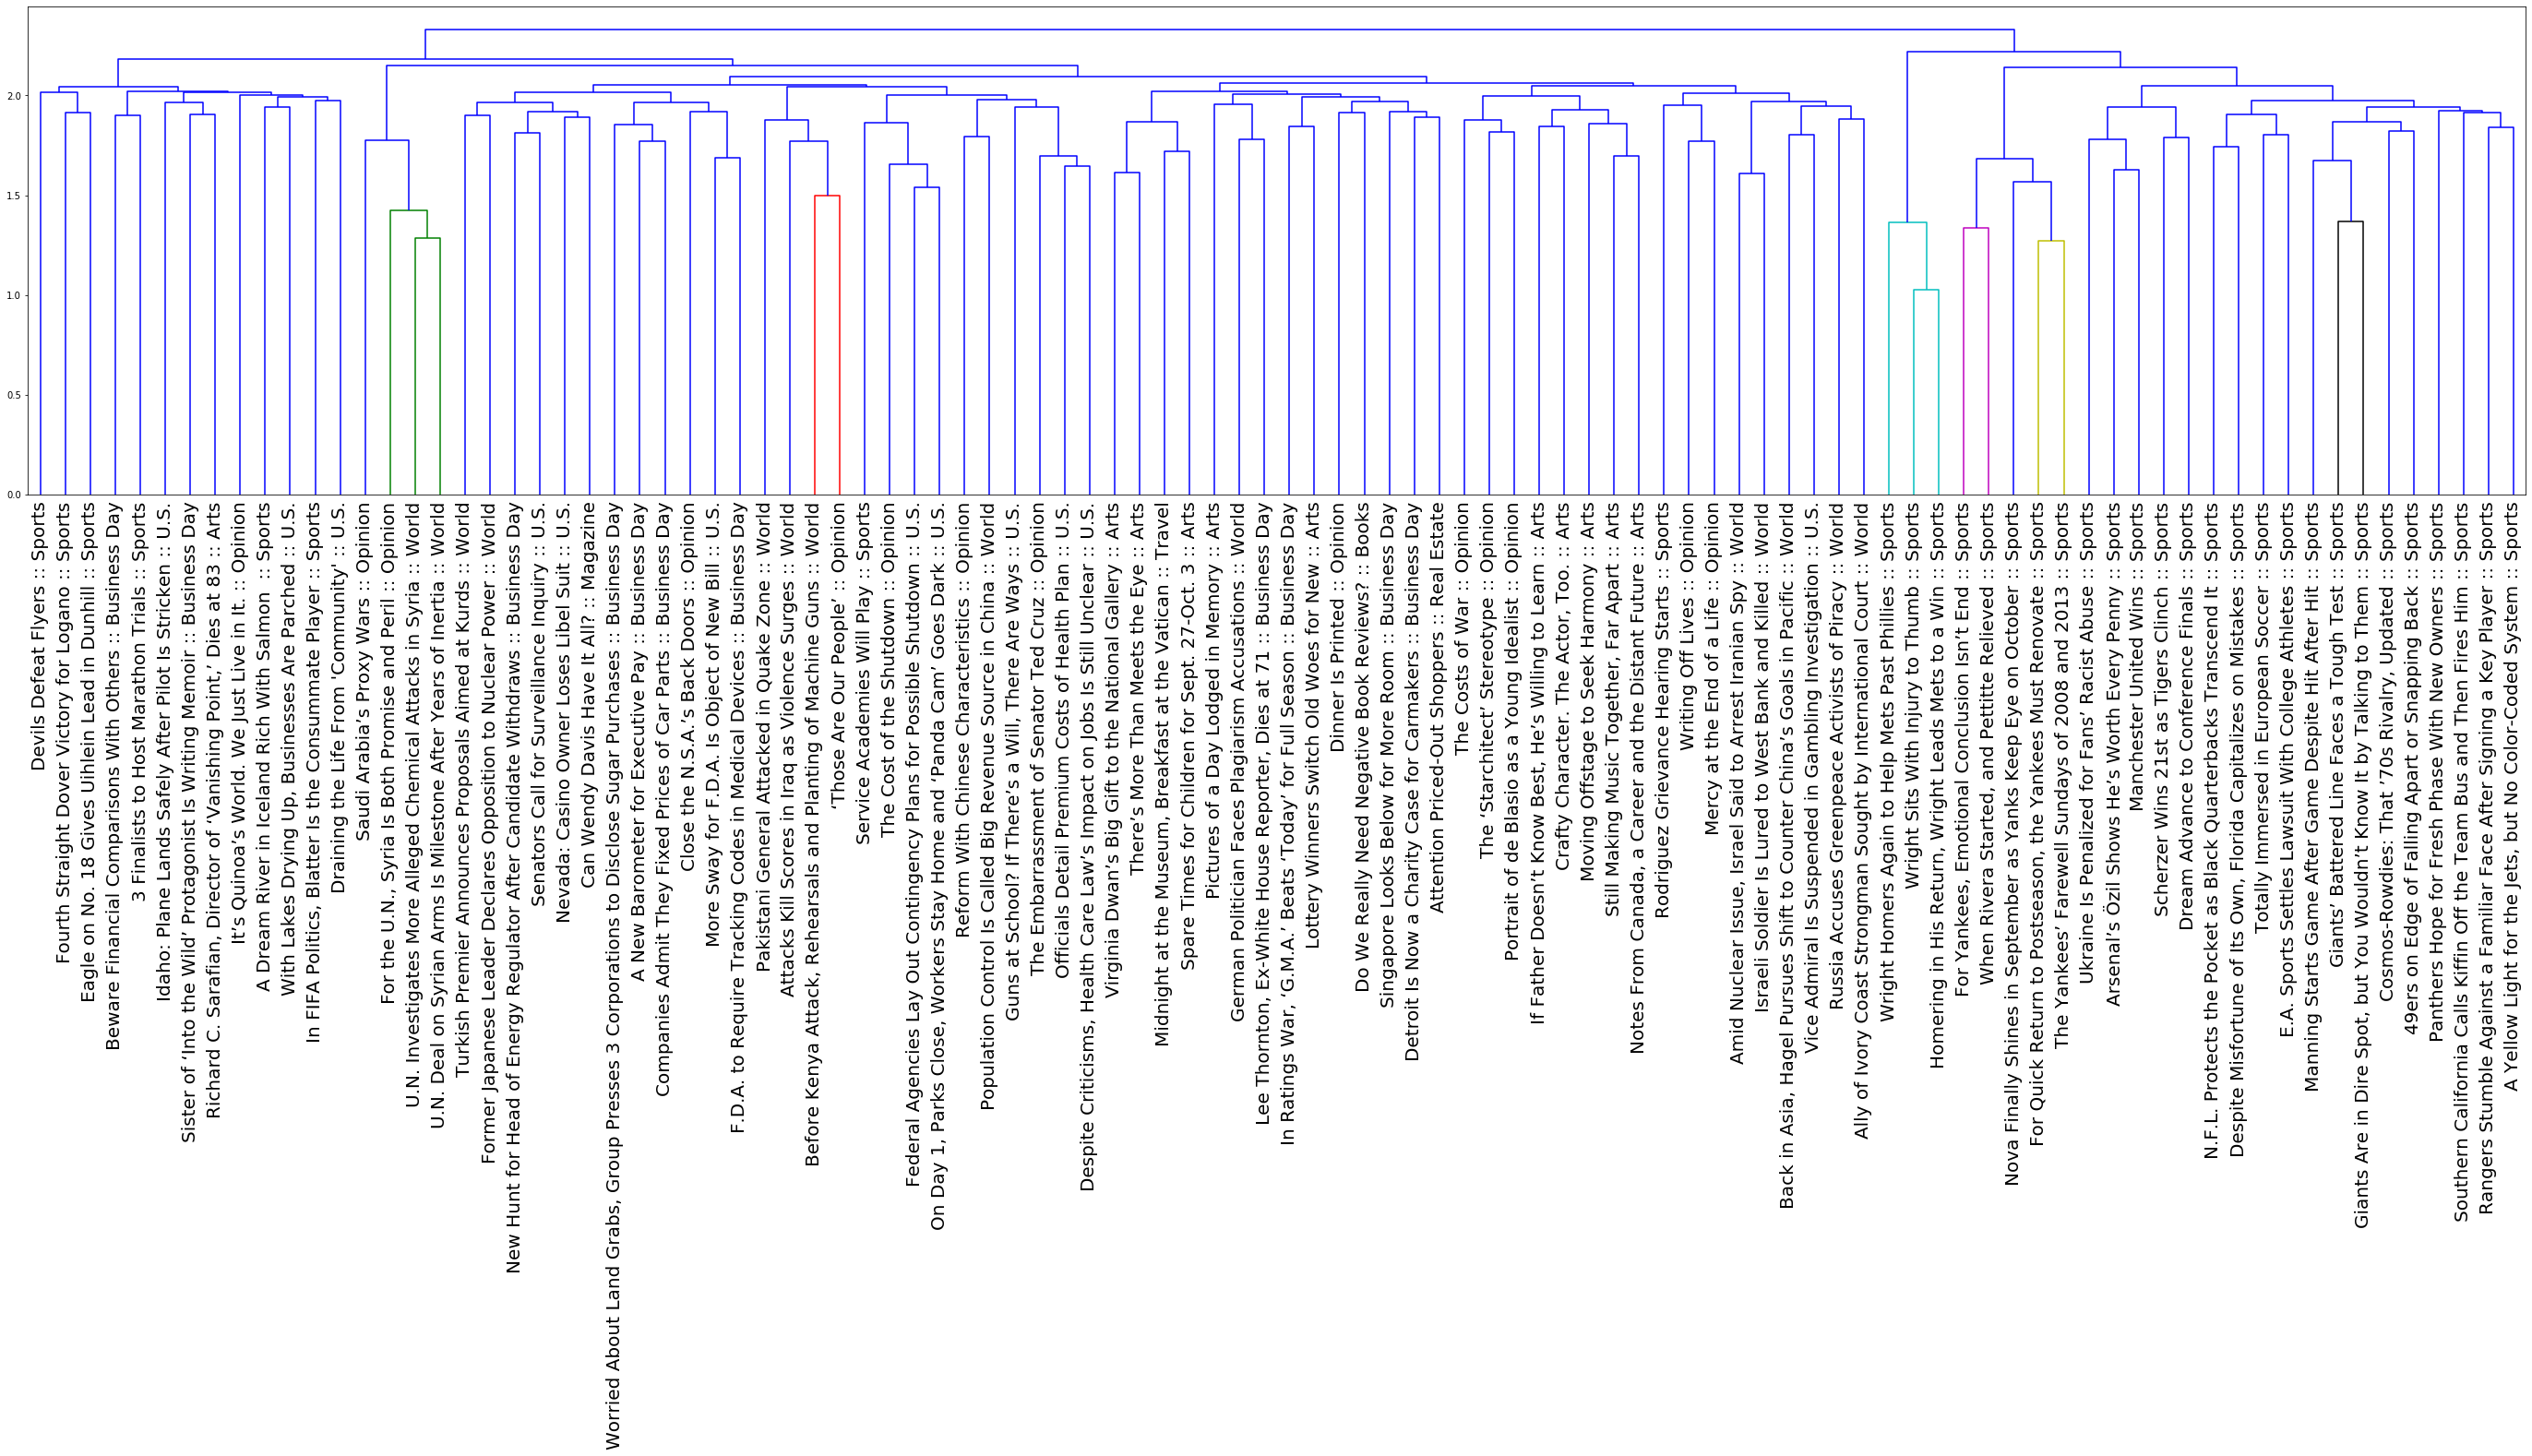

In [24]:
small_mask = np.zeros(len(articles_df)).astype(bool)
indices = np.arange(len(articles_df))
for category in articles_df['section_name'].unique():
    category_mask = (articles_df['section_name']==category).values
    new_index = np.random.choice(indices[category_mask])
    small_mask[new_index] = True
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      100 - sum(small_mask),
                                      replace=False)
small_mask[additional_indices] = True
small_df = articles_df.loc[small_mask]
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()
distances = pdist(small_X.todense(), metric='Euclidean')

distxy = squareform(distances)
link = linkage(distxy, method='complete')

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=20,
                    labels=labels, ax=ax)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
plt.show()

### 7. Perform the same analysis as above and inspect the dendrogram with the words from the articles.

/home/pkgalea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


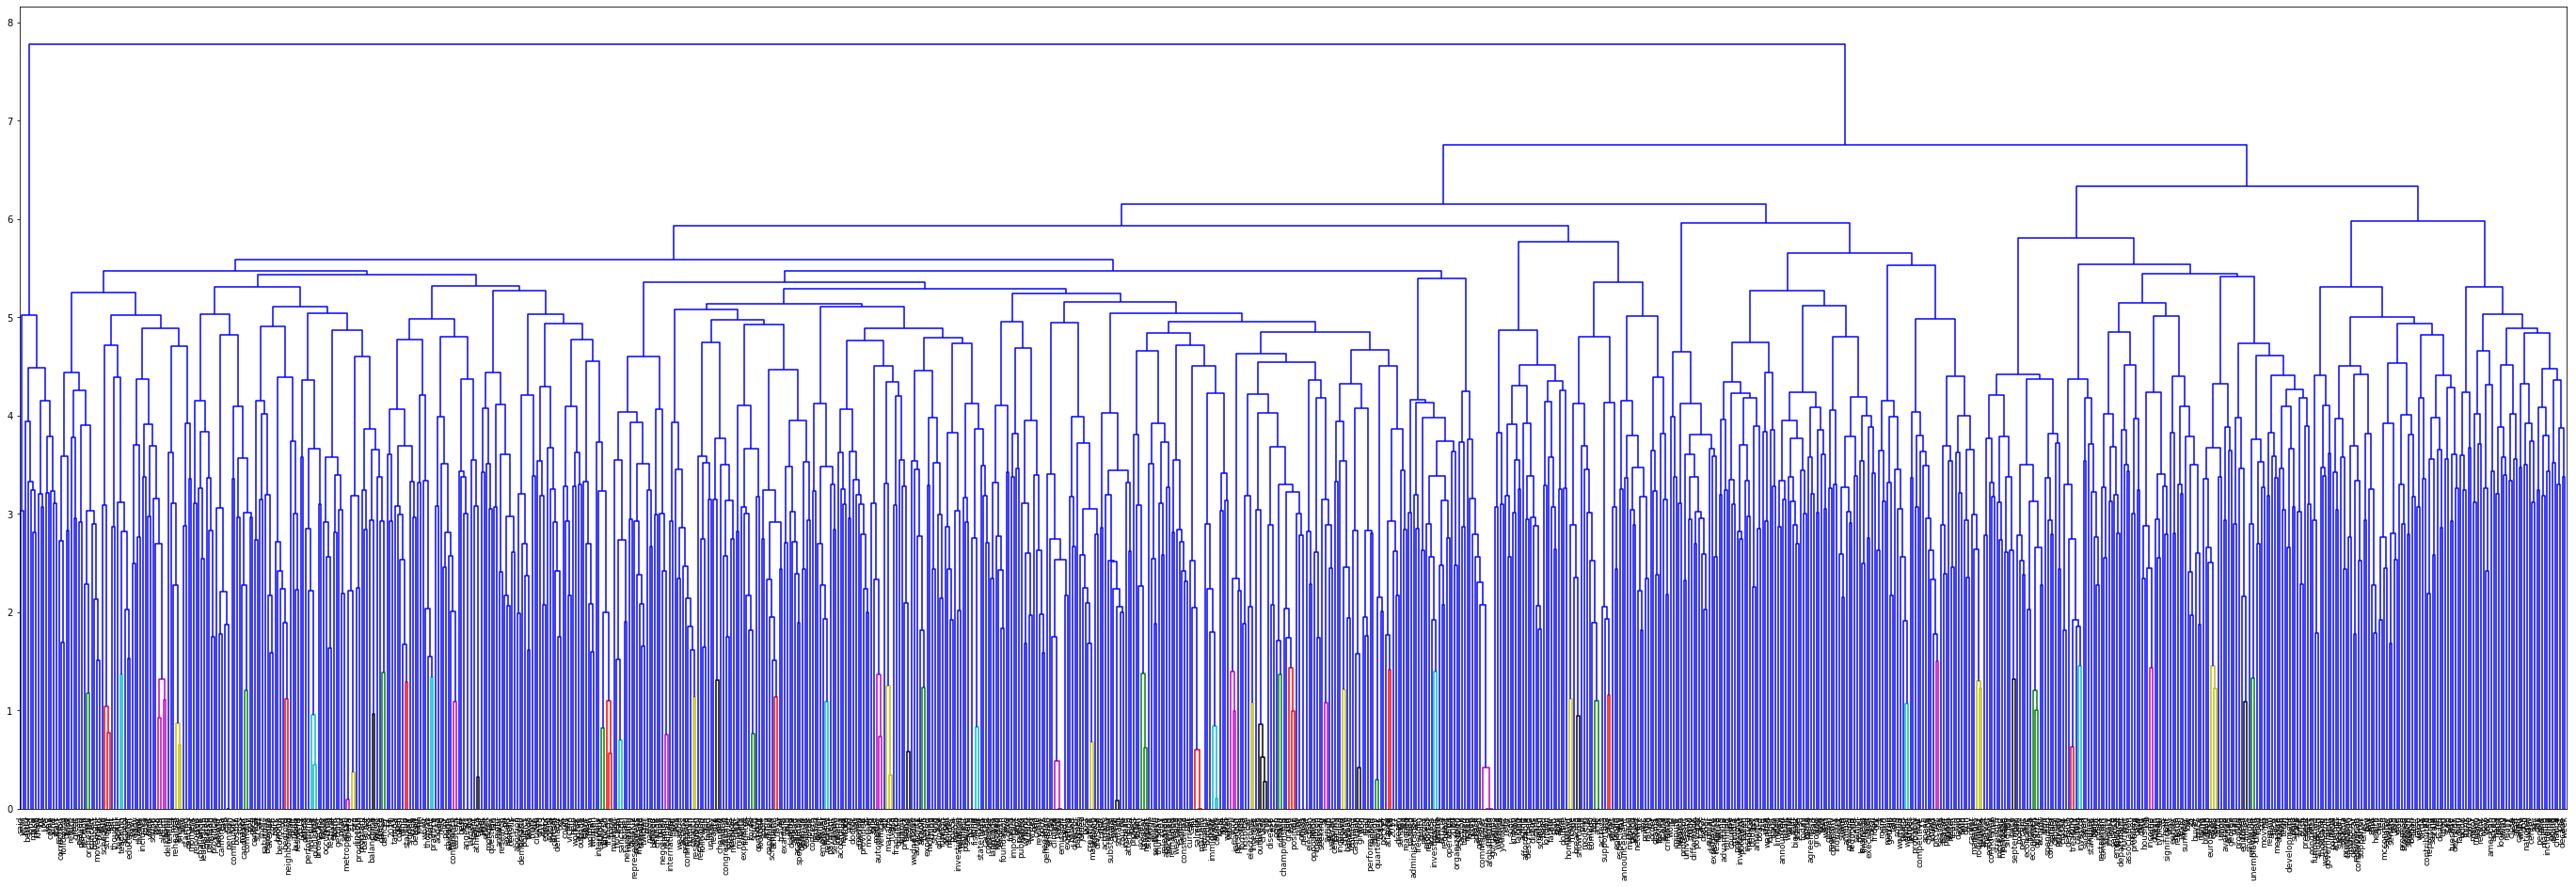

In [16]:
distxy_words = squareform(pdist(small_X.T.todense(), metric='cosine'))
fig, ax = plt.subplots(figsize=(40,15))
dendro = dendrogram(linkage(distxy_words, method='complete'),
                    color_threshold=1.5, leaf_font_size=9,
                    labels=small_features, ax=ax)
plt.subplots_adjust(top=.99, bottom=0.2, left=0.05, right=0.99)